In [10]:
import pandas as pd
import numpy as np
from wgs_qc_utils.reader import read_variant_calls

data = pd.read_csv("DLP_wgs_counts_with_wgs_concordance.csv", sep="\t")
data2=data

In [11]:
dlp_museq_file = '/work/shah/tantalus/SC-3804/results/variant_calling/sample_SA1255LA/museq.vcf.gz'
dlp_strelka_file = '/work/shah/tantalus/SC-3804/results/variant_calling/sample_SA1255LA/strelka_snv.vcf.gz'

dlp_museq = read_variant_calls.read_with_tumour(dlp_museq_file)
dlp_museq = dlp_museq.astype({"AC_normal": "int", "AC_tumour": "int", "RC_normal": "int", "RC_tumour": "int"})

dlp_museq["tumour_vaf"] = dlp_museq.AC_normal/(dlp_museq.AC_normal+dlp_museq.RC_normal)
dlp_museq["normal_vaf"] = dlp_museq.AC_tumour/(dlp_museq.AC_tumour+dlp_museq.RC_tumour)

dlp_museq=dlp_museq[["chr", "pos","alt", "ref", "normal_vaf", "tumour_vaf"]]




In [9]:
dlp_museq.columns

Index(['chr', 'pos', 'id', 'ref', 'alt', 'qual', 'filter', 'info', 'RC_normal',
       'AC_normal', 'NI_normal', 'ND_normal', 'DP_normal', 'GT_normal',
       'PL_normal', 'RC_tumour', 'AC_tumour', 'NI_tumour', 'ND_tumour',
       'DP_tumour', 'GT_tumour', 'PL_tumour'],
      dtype='object')

In [13]:
data["dlp_museq_score"] = data.dlp_museq_score.apply(lambda pr: pr.split("=")[1] if isinstance(pr, str) else "")
data["dlp_museq_score"] = data.dlp_museq_score.apply(lambda pr: float(pr) if pr!="" else np.nan)

data["dlp_strelka_score"] = data.dlp_strelka_score.apply(lambda pr: pr.split("=")[1] if   isinstance(pr, str) else "")
data["dlp_strelka_score"] = data.dlp_strelka_score.apply(lambda pr: float(pr) if pr!="" else np.nan)

data = data[(data.dlp_museq_score > 0.8) & (data.dlp_strelka_score>20)]
data["wgs_vaf"] = data.tumour_alt/(data.tumour_alt +data.tumour_ref)


data=data.merge(dlp_museq, on=["chr", "pos", "alt", "ref"], how="outer")
# data["dlp_museq_vaf"] = [np.nan] *len(data.index)
# data.loc[data[data.dlp_museq_caller==True], "dlp_museq_vaf"] = dlp_museq.tumour_vaf

/home/abramsd/miniconda3/envs/mypython3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(array([1.000e+01, 1.380e+02, 8.240e+02, 2.113e+03, 3.745e+03, 5.876e+03,
        7.292e+03, 7.299e+03, 7.819e+03, 5.834e+03, 6.150e+03, 4.617e+03,
        4.560e+03, 3.373e+03, 3.354e+03, 3.022e+03, 2.457e+03, 2.325e+03,
        1.540e+03, 2.365e+03, 1.601e+03, 1.662e+03, 1.393e+03, 7.860e+02,
        1.624e+03, 9.330e+02, 9.570e+02, 9.820e+02, 6.250e+02, 8.830e+02,
        5.260e+02, 5.040e+02, 9.620e+02, 4.360e+02, 4.720e+02, 3.850e+02,
        4.850e+02, 3.770e+02, 2.550e+02, 5.890e+02, 3.950e+02, 2.370e+02,
        3.700e+02, 3.250e+02, 2.120e+02, 2.320e+02, 2.340e+02, 1.970e+02,
        1.260e+02, 5.420e+02, 1.270e+02, 1.340e+02, 1.530e+02, 1.170e+02,
        1.410e+02, 1.470e+02, 1.750e+02, 7.800e+01, 6.300e+01, 1.440e+02,
        5.900e+01, 6.000e+01, 6.100e+01, 6.200e+01, 3.100e+01, 1.700e+01,
        1.190e+02, 3.500e+01, 3.100e+01, 2.500e+01, 3.000e+01, 5.600e+01,
        1.700e+01, 2.300e+01, 1.190e+02, 1.400e+01, 2.300e+01, 3.900e+01,
        2.800e+01, 7.400e+01, 2.700e+0

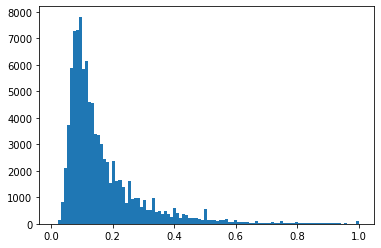

In [15]:
import matplotlib.pyplot as plt

plt.hist(data.tumour_vaf, bins=100)

In [72]:
print(len(data[(data.in_wgs_museq==True ) & (data.in_wgs_strelka==True )].index), " in common")
print(len(data[(data.in_wgs_museq==False ) & (data.in_wgs_strelka==False )].index), " just in dlp")

3  in common
10710  just in dlp


Text(0.5, 1.0, 'wgs vaf of dlp snvs PR > 0.8 QSS > 20')

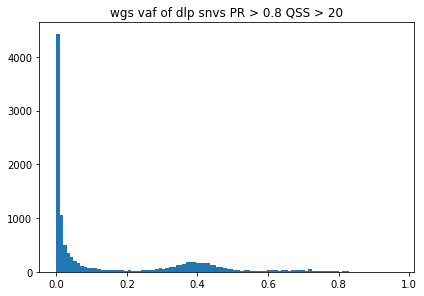

In [68]:
# most_sure = data[(data.dlp_museq_caller ==True )  & (data.dlp_strelka_caller ==True)]
# most_sure["alt_count_pseudonormalized"] =  most_sure.tumour_alt/most_sure.normal_alt.replace(0, 1)

import matplotlib.pyplot as plt
# f, axes = plt.subplots(2,2, figsize=(15,5))

# axes[0][0].set_yscale("log")
# axes[0][0].hist(most_sure.alt_count_pseudonormalized, bins=100)
# axes[0][1].set_yscale("log")
# axes[0][1].hist(most_sure.tumour_alt, bins=100)

# axes[1][0].hist(most_sure.alt_count_pseudonormalized, bins=100)
# axes[1][1].hist(most_sure.tumour_alt, bins=100)

# axes[0][0].set_title("Log(tumour read count supportal alt/normal read count supporting alt)")
# axes[0][1].set_title("Log(tumour read count supportal alt)")
# axes[1][0].set_title("tumour read count supportal alt/normal read count supporting alt")
# axes[1][1].set_title("tumour read count supportal alt")
# plt.hist(data.wgs_vaf, bins=100)
# plt.tight_layout()
# plt.title("wgs vaf of dlp snvs PR > 0.8 QSS > 20")
# len(most_sure[most_sure.alt_count_pseudonormalized > 2.5].index)/len(most_sure.index) * 100

In [44]:
import numpy as np


dlp_specific = data[(data.in_wgs_museq==False)  &  (data.in_wgs_strelka==False)]
common = data[(data.in_wgs_museq==True)  &  (data.in_wgs_strelka==True)]
common


,chr,pos,ref,alt,dlp_museq_caller,dlp_museq_score,dlp_strelka_caller,dlp_strelka_score,dlp_datatype,normal_ref,normal_alt,tumour_ref,tumour_alt,in_wgs_museq,in_wgs_strelka
508,1,15348612,G,A,True,0.99,True,135.0,DLP,48,0,19,48,True,True
2729,1,98435392,G,A,True,0.70,False,NaN,DLP,27,0,64,4,True,True
3994,1,158662829,T,A,True,0.96,True,34.0,DLP,43,0,39,14,True,True
4048,1,161114858,T,C,True,0.66,False,NaN,DLP,55,0,107,4,True,True
6026,1,236213645,G,A,True,0.98,True,39.0,DLP,46,0,99,1,True,True
7849,10,38908594,A,G,True,0.55,False,NaN,DLP,7,0,10,2,True,True


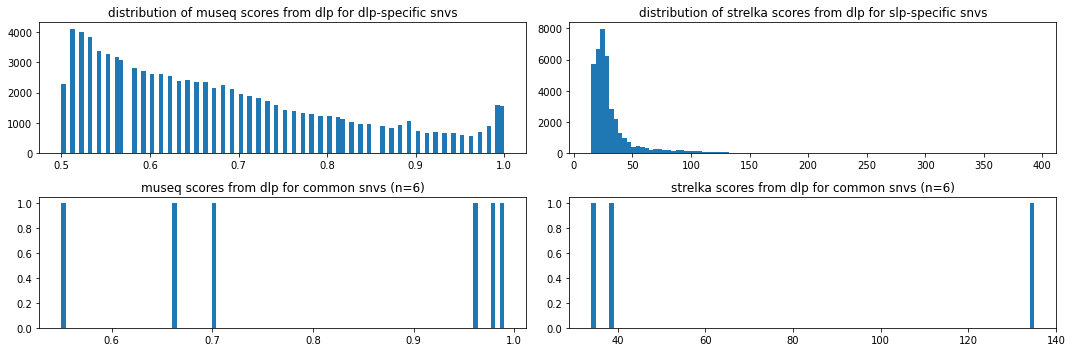

In [47]:
import matplotlib.pyplot as plt
f, axes = plt.subplots(2,2, figsize=(15,5))

axes[0][0].hist(dlp_specific.dlp_museq_score, bins=100)
axes[0][1].hist(dlp_specific.dlp_strelka_score, bins=100)
axes[1][0].hist(common.dlp_museq_score, bins=100)
axes[1][1].hist(common.dlp_strelka_score, bins=100)

axes[0][0].set_title("distribution of museq scores from dlp for dlp-specific snvs")
axes[0][1].set_title("distribution of strelka scores from dlp for slp-specific snvs")
axes[1][0].set_title("museq scores from dlp for common snvs (n=6)")
axes[1][1].set_title("strelka scores from dlp for common snvs (n=6)")

plt.tight_layout()
